<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Clustering and PCA</center></h1>



## Problem Statement - UL Project - Coded
##             (Credit Card)

### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help



### Objective

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.



### Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

### Data Dictionary

Sl_No: Primary key of the records
Customer Key: Customer identification number
Average Credit Limit: Average credit limit of each customer for all credit cards
Total credit cards: Total number of credit cards possessed by the customer
Total visits bank: Total number of visits that the customer made (yearly) personally to the bank
Total visits online: Total number of visits or online logins made by the customer (yearly)
Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# To remove from the limit for the number of rows and column displayed.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Using Pandas to read the XLSX file

In [ ]:
#Reading the xlsx file
raw_data = pd.read_excel("Credit+Card+Customer+Data.xlsx")

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
raw_data.shape

(660, 7)

* The dataset has 660 rows and 7 columns

### Displaying few rows of the dataset

In [ ]:
# viewing a random sample of the dataset
raw_data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = raw_data.copy()

### Checking the data types of the columns for the dataset

In [ ]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [ ]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### Observation

1. No null value present in this dataset.
2. There are 660 rows and 7 column.
3. all the values type is int64. No need to deal with any object

### Let's take a look at the summary of the data

In [ ]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [ ]:
# Checking duplicates values

df.nunique()

,0
Sl_No,660
Customer Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


In [ ]:
#From df.info() we got to know, there was none missing value and its alternative method to checking it
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


### Lets drop not important columns like Sl_NO & Customer Key.

In [ ]:
df = df.drop(['Sl_No', 'Customer Key'], axis=1)
print(df.head())

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
4                   12                 3  


## Exploratory Data Analysis

### Univariate Analysis

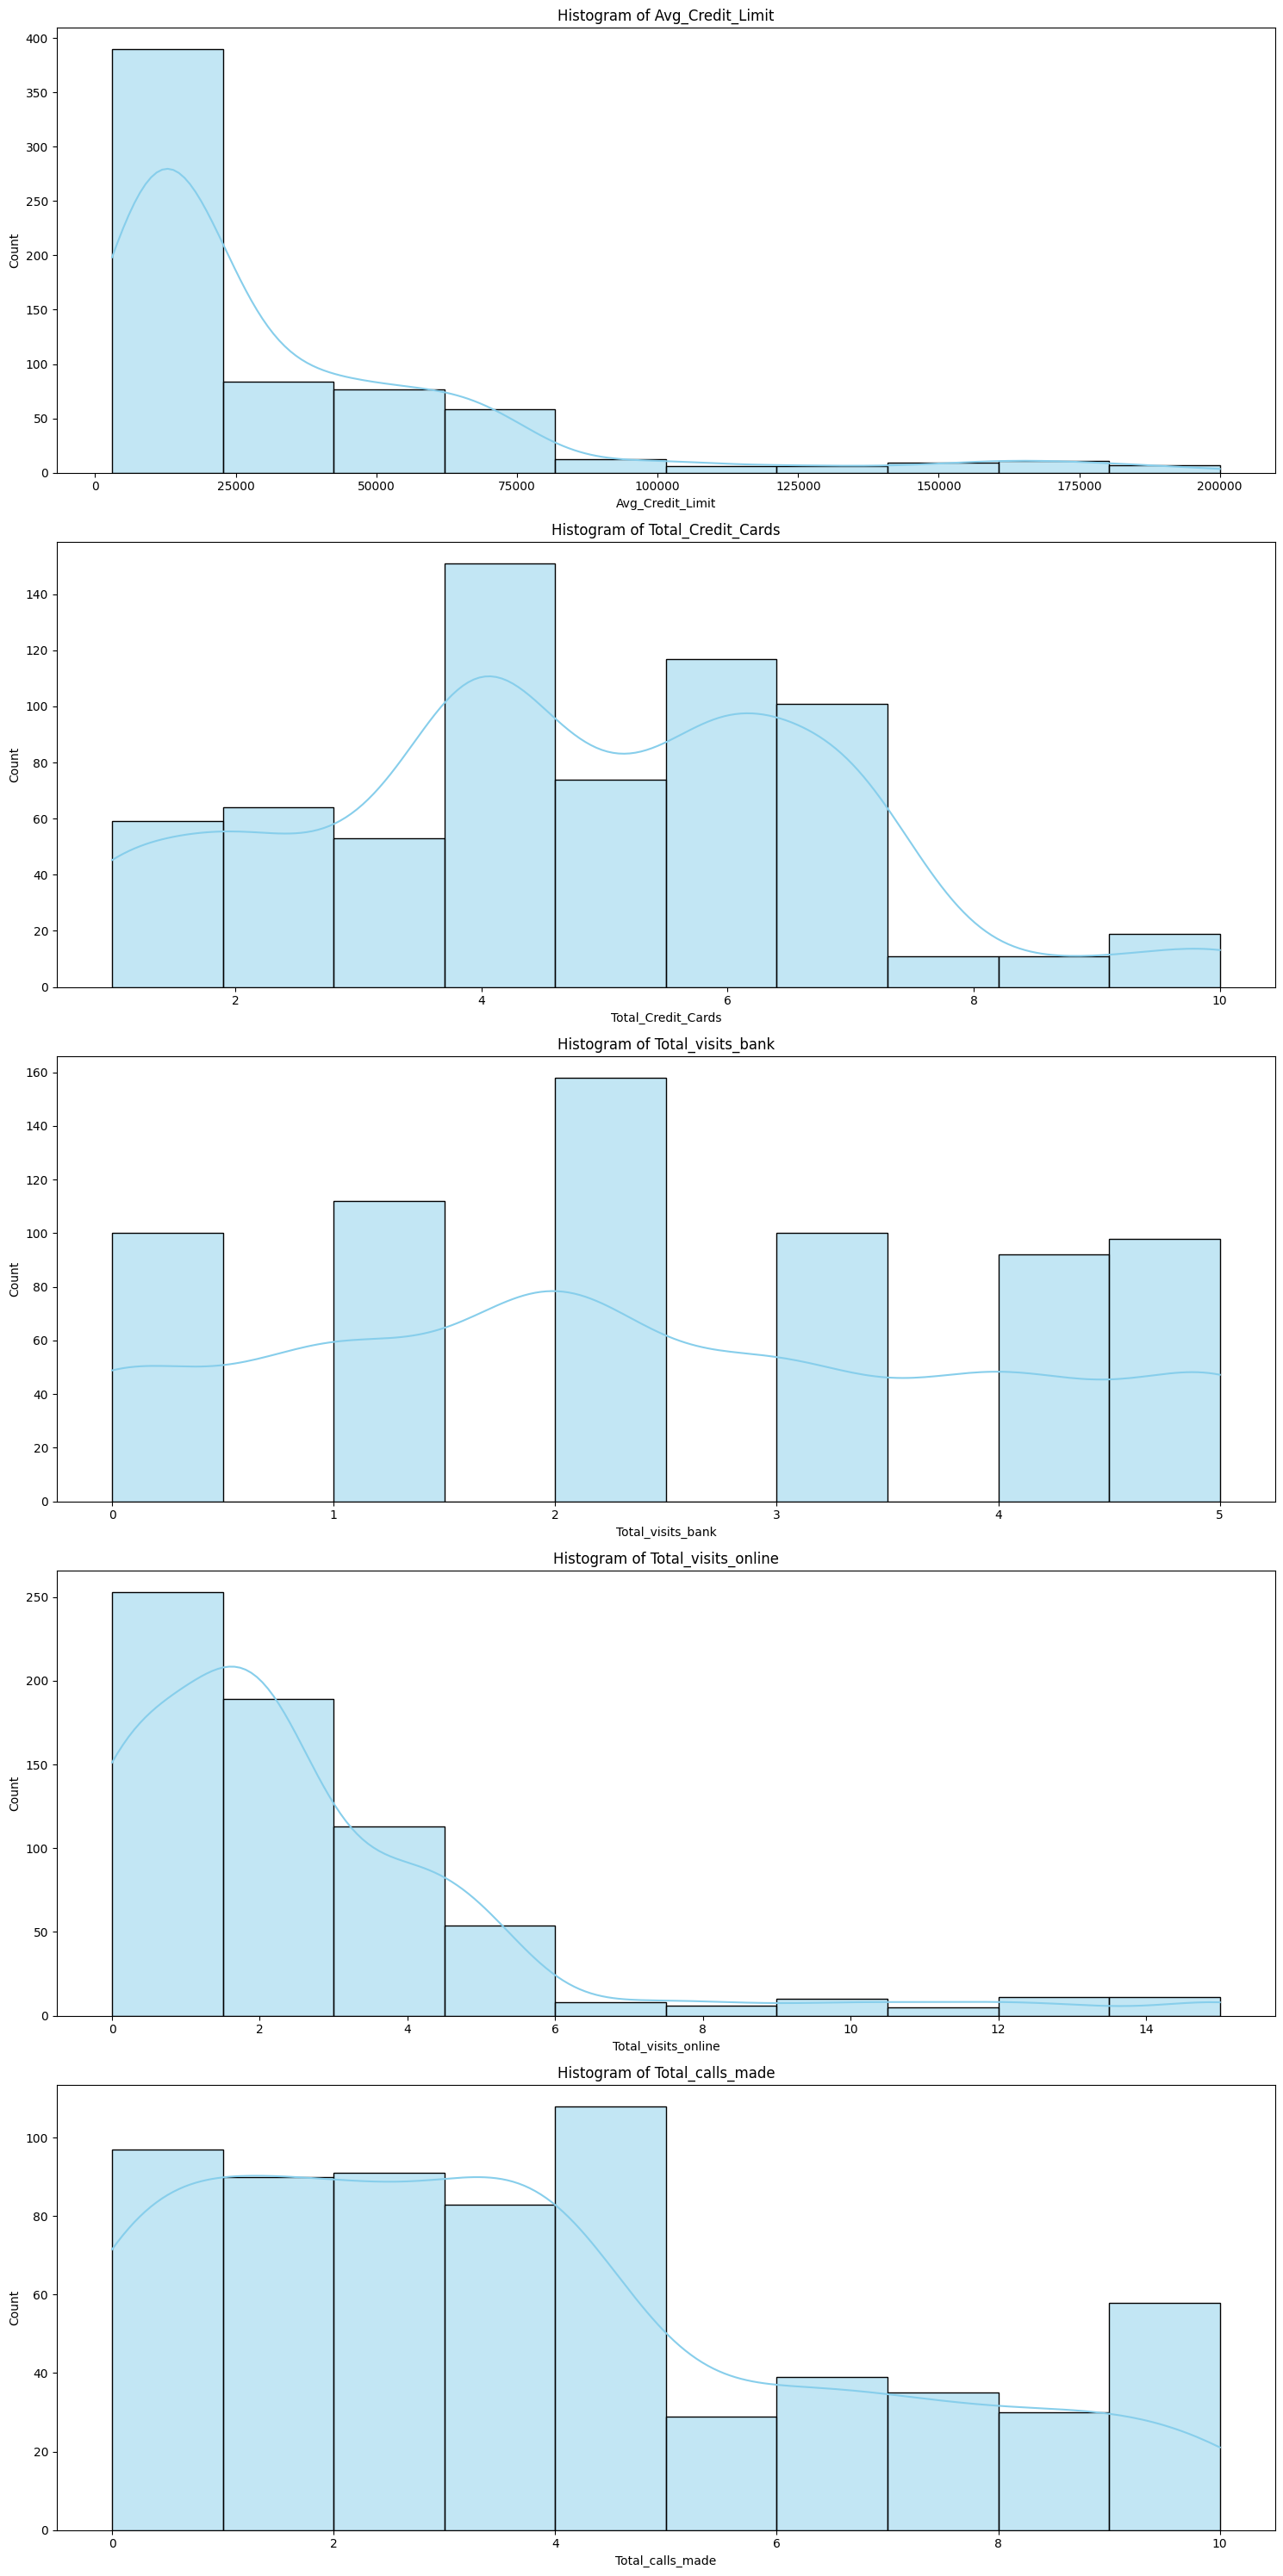

In [ ]:
#Lets draw a histogram.
figsize=(15, 6)
bins=10
num_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Select numeric columns
num_features = len(num_cols)

fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(figsize[0], figsize[1] * num_features))
axes = axes.flatten() if num_features > 1 else [axes]

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=bins, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


## Observation

##### Average Credit Limit:
Most customers seem to have an average credit limit ranging from 0 to 25,000. This indicates that higher credit limits are quite rare among the customer base.

##### Total Credit Cards:
It looks like the majority of customers own between 2 to 6 credit cards, with 4 being the most common number. This suggests a moderate level of card ownership.

##### Total Bank Visits:
When it comes to visiting the bank, the most frequent number of visits per customer is 2. This shows that customers don't tend to visit the bank very often.

##### Total Online Visits:
Most customers log between 0 to 3 online visits. After that, the number of customers drops significantly, indicating fewer people make frequent online visits.

##### Total Calls Made:
The calls made by customers are fairly evenly spread between 0 and 5 calls, with a slight preference for making 4 calls. There's a noticeable decline in customers making more than 5 calls.

### Bivariate Analysis

<ipython-input-105-0ac7029797c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df[target_col], ax=axes[i], palette='pastel')
<ipython-input-105-0ac7029797c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df[target_col], ax=axes[i], palette='pastel')
<ipython-input-105-0ac7029797c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df[target_col], ax=axes[i], palette='pastel')
<ipython-input-105-0ac7029797c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

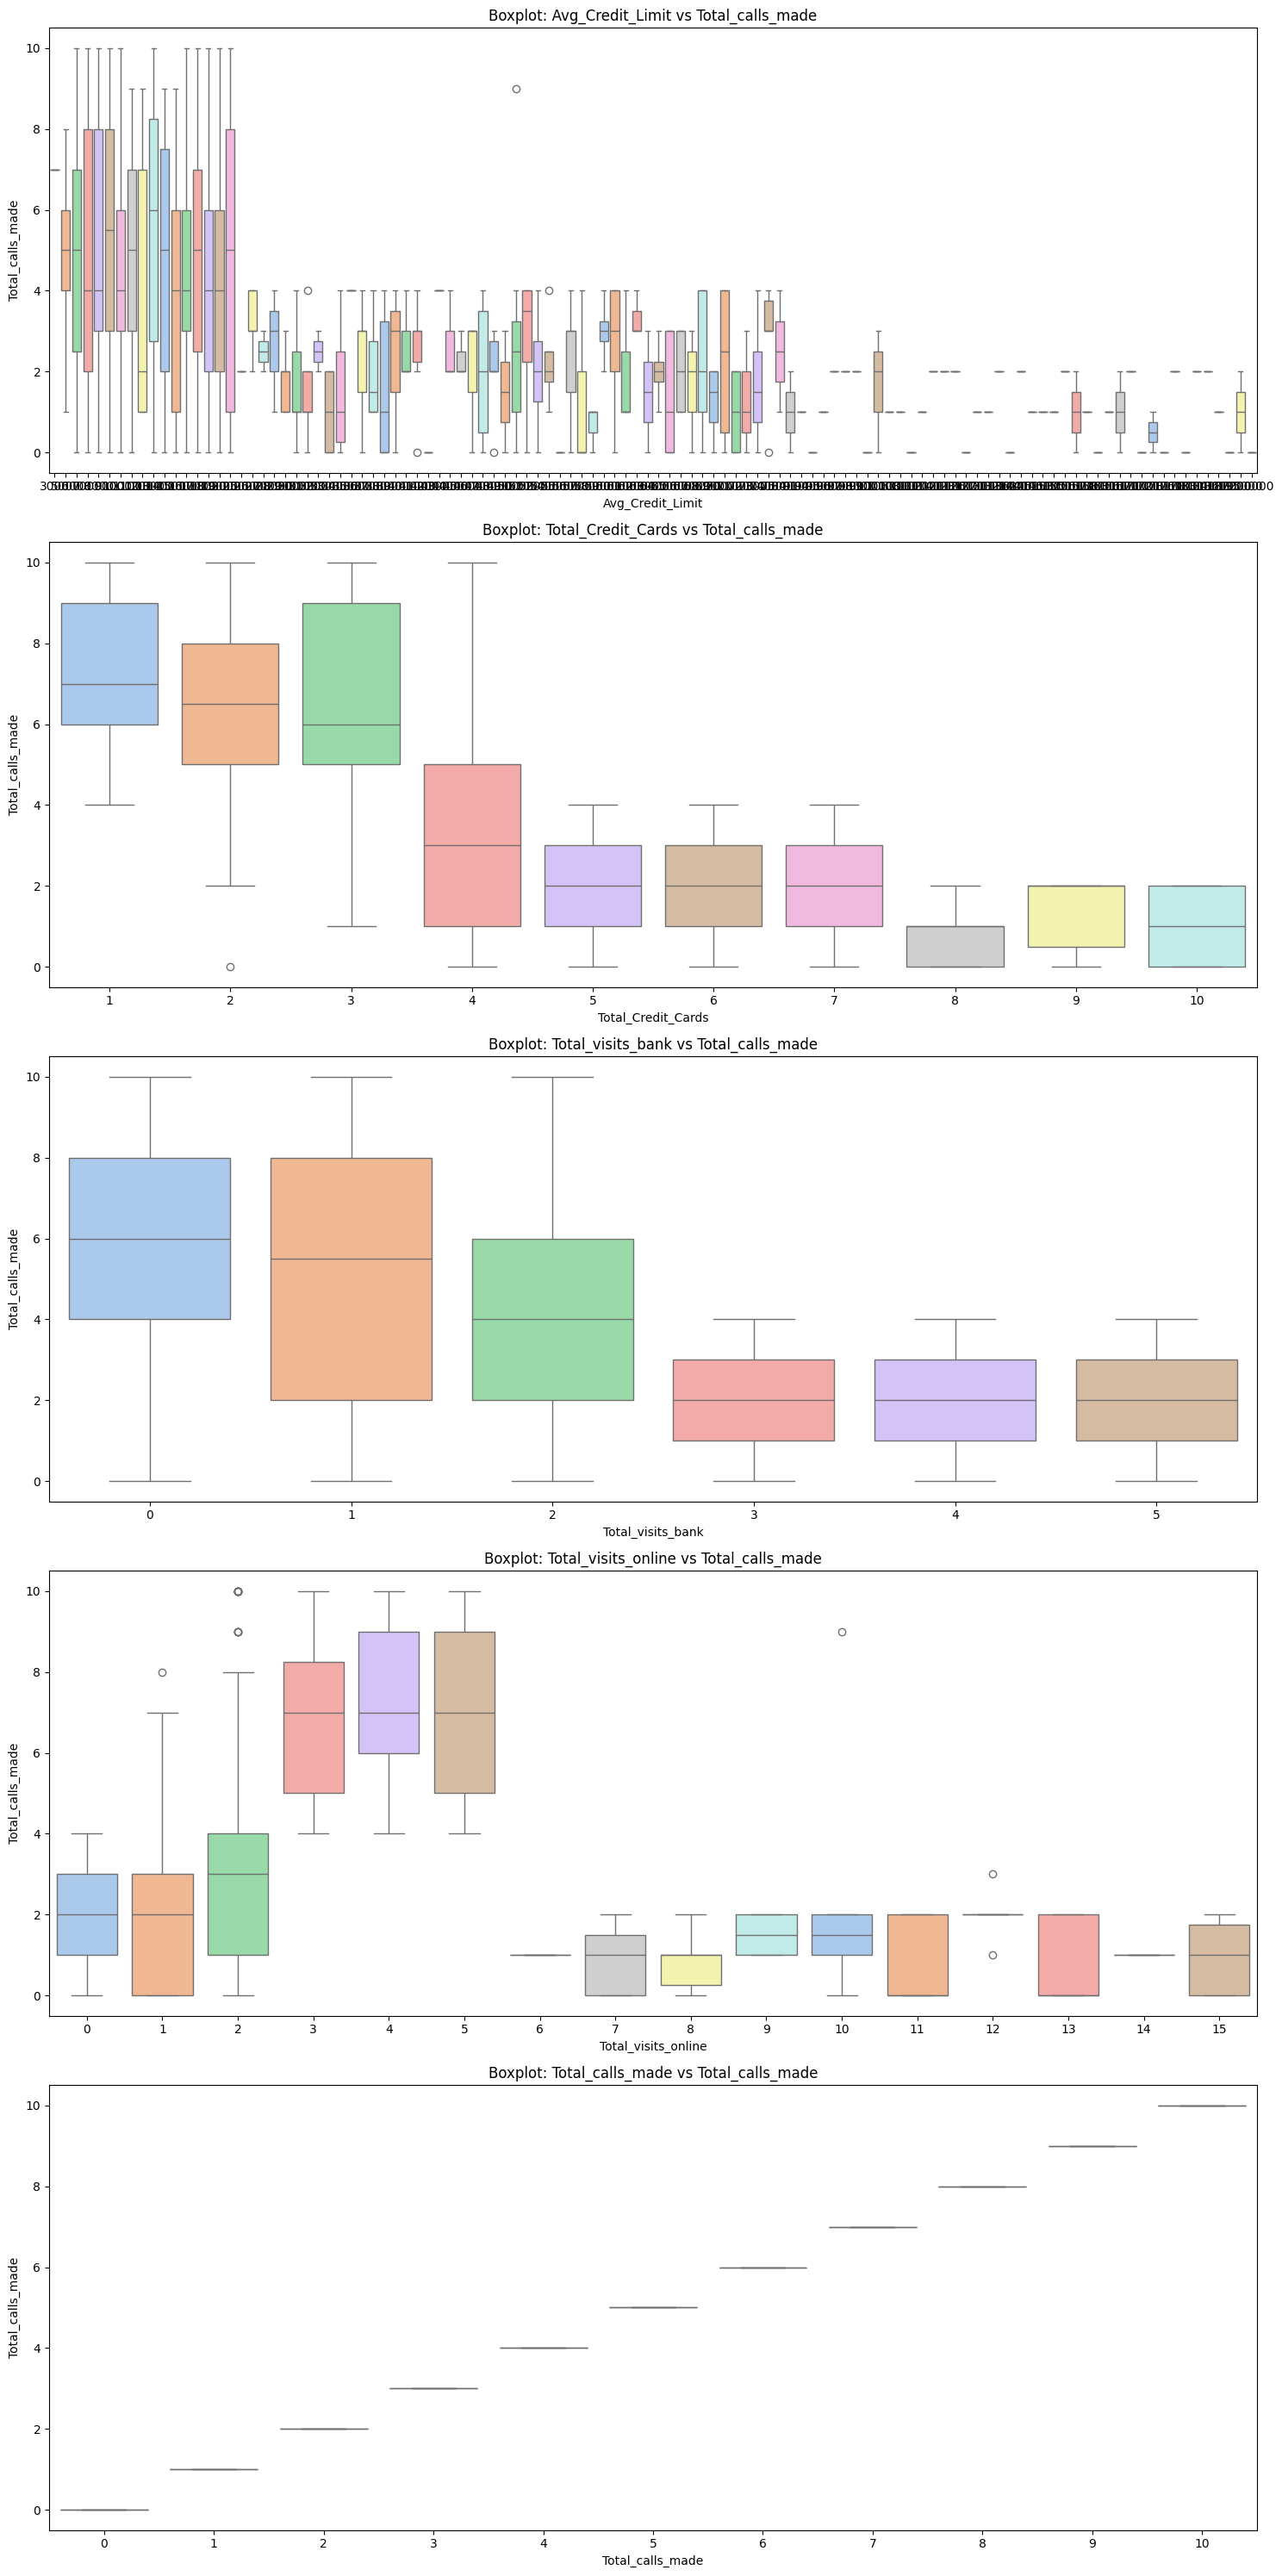

In [ ]:
# Lets plot a Boxplot
target_col = 'Total_calls_made'

fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(figsize[0], figsize[1] * num_features))
axes = axes.flatten() if num_features > 1 else [axes]

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], y=df[target_col], ax=axes[i], palette='pastel')
    axes[i].set_title(f"Boxplot: {col} vs {target_col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)

plt.tight_layout()
plt.show()


## Observation
##### Average Credit Limit vs Total Calls:
It seems that the average credit limit doesn't have a strong relationship with the total number of calls made. Regardless of the credit limit, most customers seem to make a similar range of calls.

##### Total Credit Cards vs Total Calls:
Customers with 3 to 4 credit cards tend to make more calls compared to those with fewer or more cards. This suggests that having a moderate number of credit cards might correlate with more frequent calls.

##### Total Bank Visits vs Total Calls:
There is a noticeable trend where customers who visit the bank more frequently also tend to make more calls. This indicates a possible connection between in-person bank interactions and phone communication.

##### Total Online Visits vs Total Calls:
Similarly, customers who make more online visits also tend to make more calls. This pattern suggests that those who are more active online are also more likely to engage in phone communication.

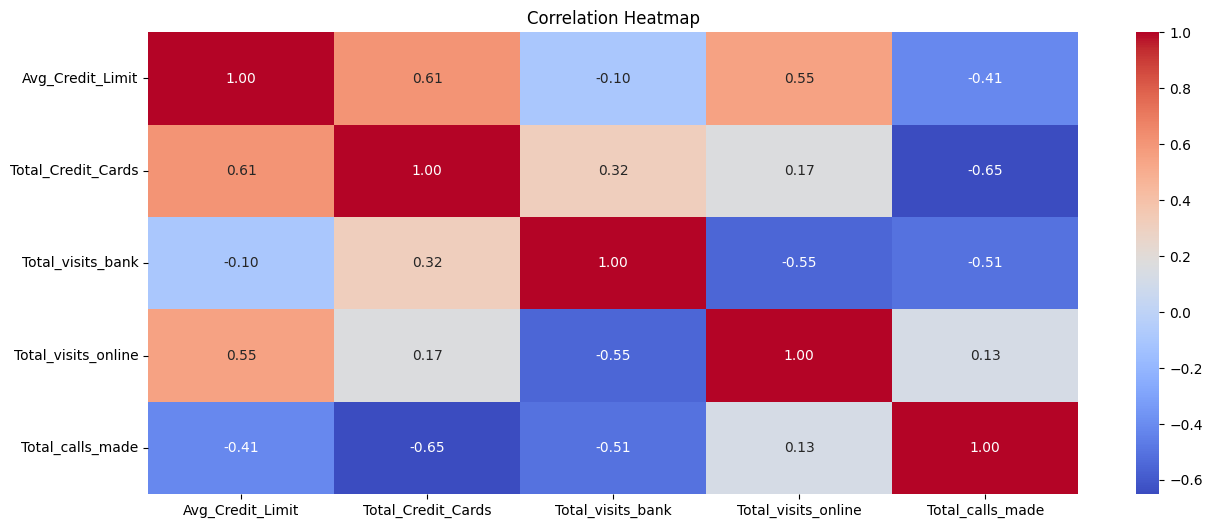

In [ ]:
# Lets plot a correlation heatmap
figsize=(15, 6)
target_col = 'Total_calls_made'
# Select numeric columns (excluding the target variable)
num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target_col]
num_features = len(num_cols)

plt.figure(figsize=figsize)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Key Insights:
#### Credit Limit & Credit Cards:
Higher average credit limits are linked with owning more credit cards. These customers also tend to visit the bank more often but engage less online and over the phone.

#### Online Activity & Calls:
Customers who are active online also tend to make more phone calls. Conversely, those less active online prefer in-person bank visits.

#### Bank Visits:
Frequent bank visitors usually have more credit cards and higher credit limits, but they rely less on digital and phone channels.

# Data Preprocessing

1. There was no missing data present.
2. Sl_No and Custemer Key is removed since its not usefull in analysis.
2. all the values in int64 by defoult so there was no need for num conversion.
3. Need to remove outliers.
4. Lets use the standard scaler to scale the data between -1 to 1.


# Removing Outliers

In [ ]:
data_cleaned = df.copy()
numeric_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with outliers
    df = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]
    df1 = data_cleaned.copy()


print("Dataset after removing outliers:")
df.info()

Dataset after removing outliers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [ ]:
# Assume 'data_cleaned' is the preprocessed dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_data.head())

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.740187           -1.249225          -0.860451   
1          0.410293           -0.787585          -1.473731   
2          0.410293            1.058973          -0.860451   
3         -0.121665            0.135694          -0.860451   
4          1.740187            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.547490         -1.251537  
1             2.520519          1.891859  
2             0.134290          0.145528  
3            -0.547490          0.145528  
4             3.202298         -0.203739  


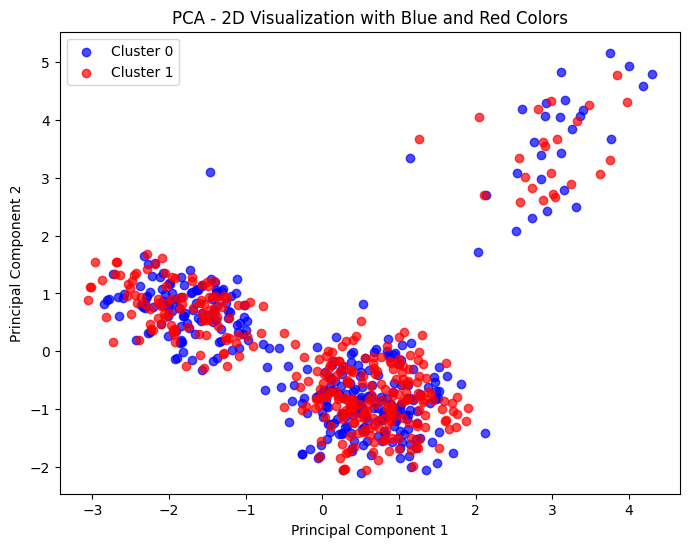

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for 2D visualization
pca_result = pca.fit_transform(scaled_data)
labels = np.random.choice([0, 1], size=pca_result.shape[0])  # Replace with actual labels if available

plt.figure(figsize=(8, 6))
for label, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(pca_result[labels == label, 0],
                pca_result[labels == label, 1],
                color=color, alpha=0.7, label=f'Cluster {label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization with Blue and Red Colors')
plt.legend()
plt.show()


In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance:", pca.explained_variance_ratio_.cumsum())


Explained Variance Ratio: [0.45736578 0.37426483]
Cumulative Variance: [0.45736578 0.83163061]


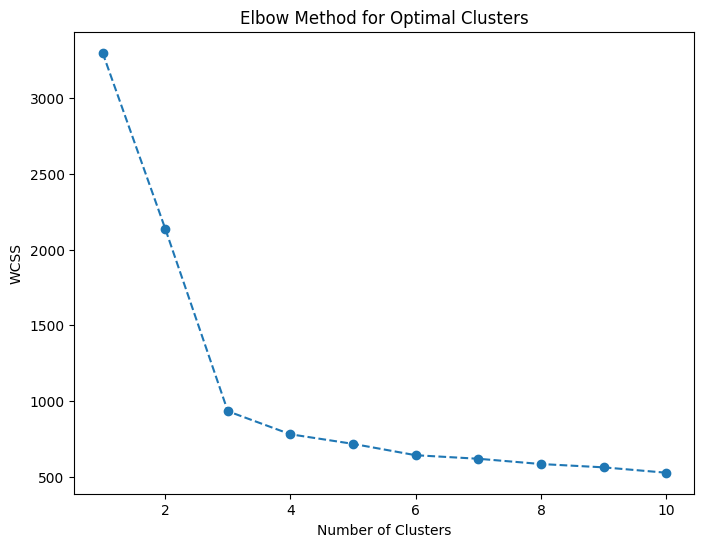

In [ ]:
#Finding the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()



# K-means Clustering

Silhouette Score for 3 clusters: 0.52


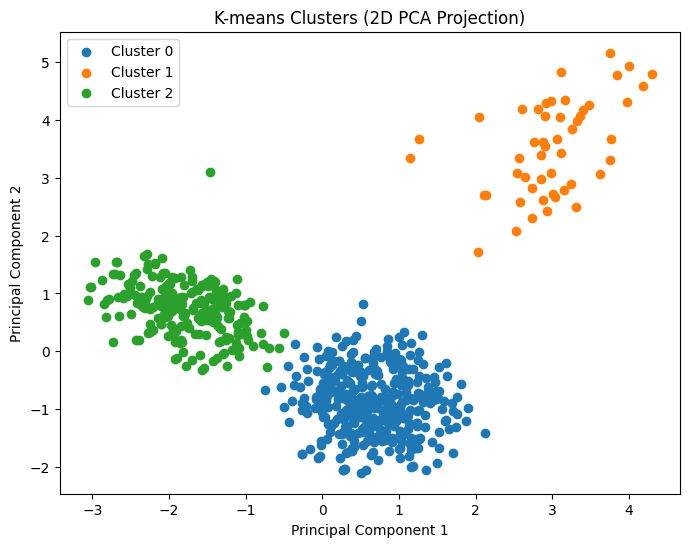

In [ ]:
optimal_clusters = 3  # From above chart
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

#Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.2f}')

# Visualizing clusters in 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
for label in range(optimal_clusters):
    plt.scatter(pca_result[cluster_labels == label, 0],
                pca_result[cluster_labels == label, 1],
                label=f'Cluster {label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clusters (2D PCA Projection)')
plt.legend()
plt.show()

# Hierarchical Clustering

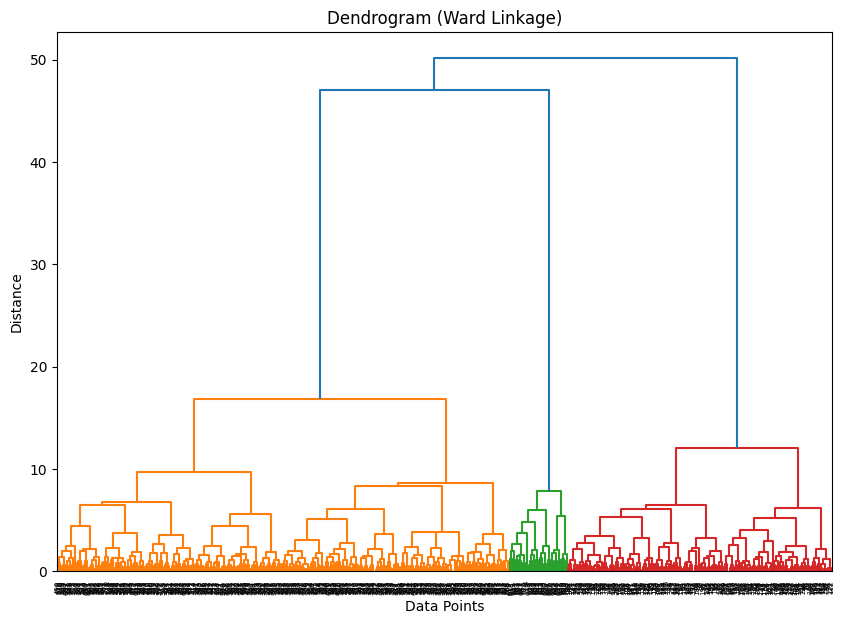

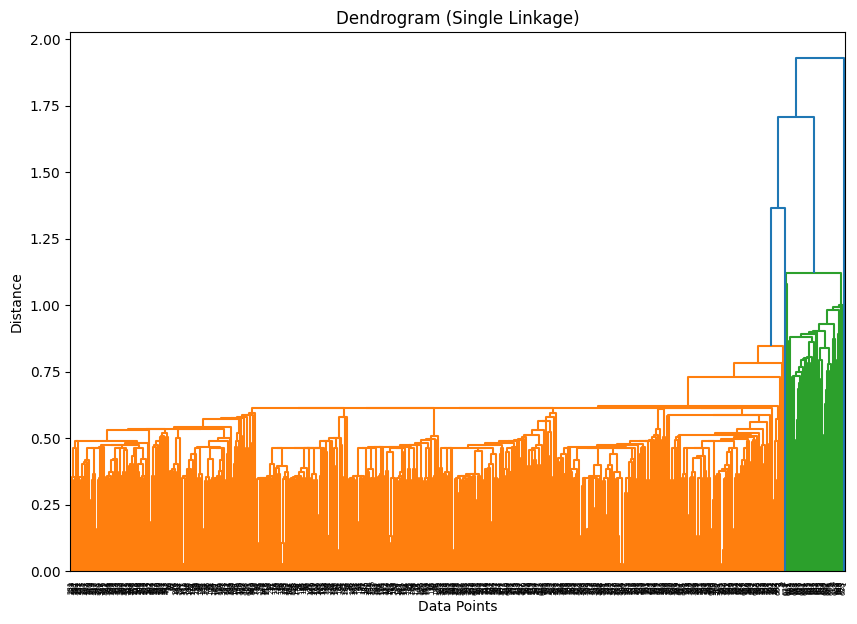

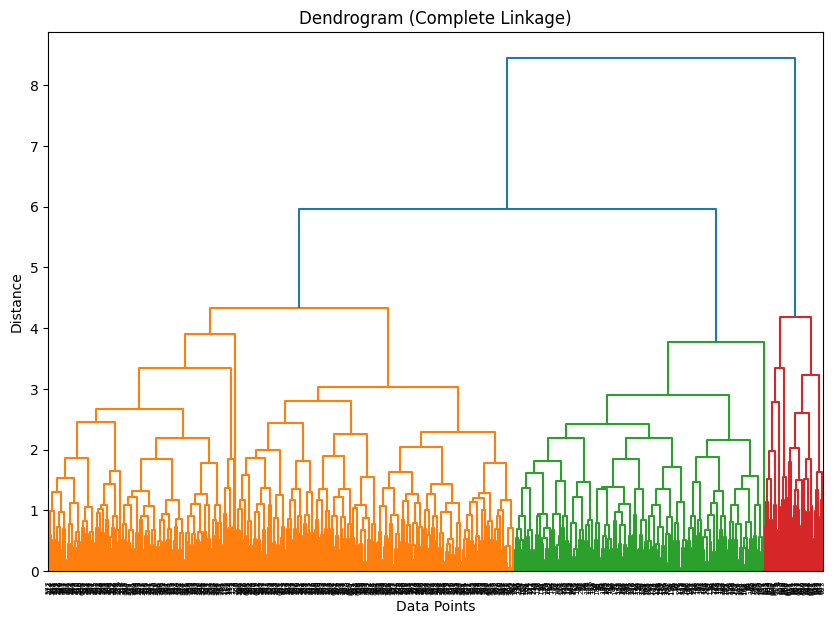

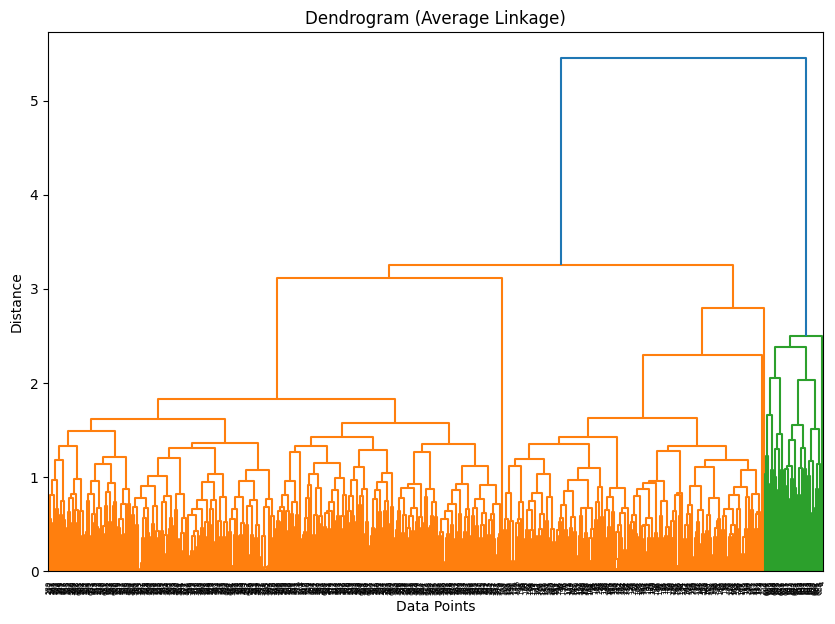

Cophenetic Correlation Coefficients:
Ward Linkage: 0.74
Single Linkage: 0.74
Complete Linkage: 0.86
Average Linkage: 0.90

Optimal Linkage Method: Average


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

linkage_methods = ['ward', 'single', 'complete', 'average']

cophenetic_scores = {}


for method in linkage_methods:
    linked = linkage(scaled_data, method=method)

    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

    coph_corr, _ = cophenet(linked, pdist(scaled_data))
    cophenetic_scores[method] = coph_corr

print("Cophenetic Correlation Coefficients:")
for method, score in cophenetic_scores.items():
    print(f"{method.capitalize()} Linkage: {score:.2f}")

optimal_linkage = max(cophenetic_scores, key=cophenetic_scores.get)
print(f"\nOptimal Linkage Method: {optimal_linkage.capitalize()}")


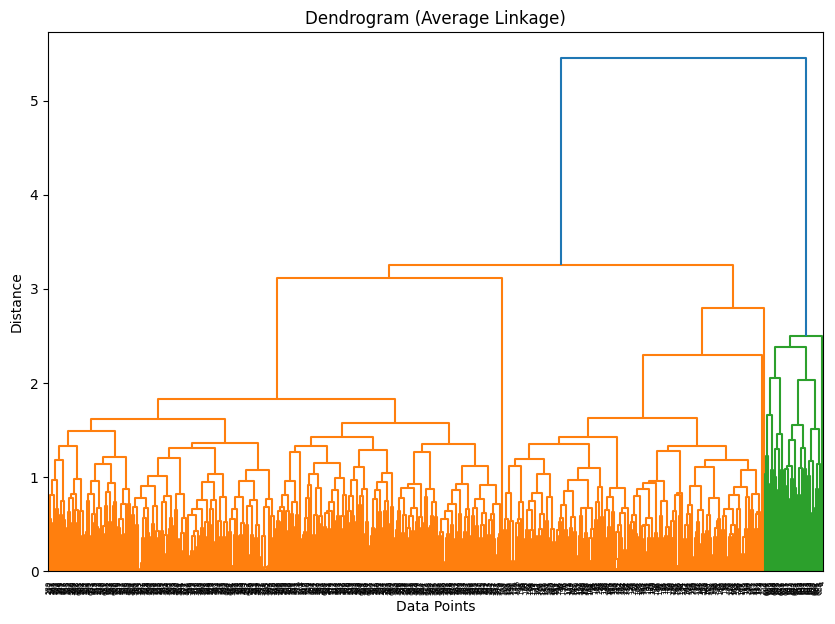

Silhouette Score for 3 clusters: 0.52


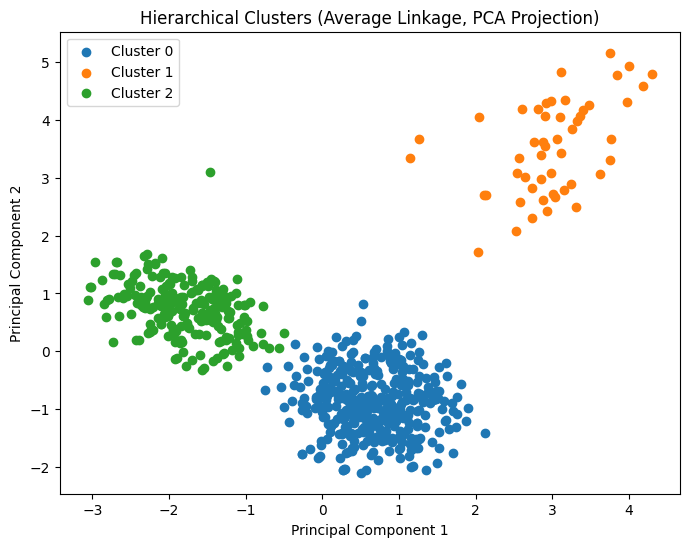

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

optimal_linkage = 'average'

linked = linkage(scaled_data, method=optimal_linkage)


plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title(f'Dendrogram ({optimal_linkage.capitalize()} Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=optimal_linkage)
cluster_labels = hierarchical_clustering.fit_predict(scaled_data)


silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}')

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
for label in range(n_clusters):
    plt.scatter(pca_result[cluster_labels == label, 0],
                pca_result[cluster_labels == label, 1],
                label=f'Cluster {label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Hierarchical Clusters ({optimal_linkage.capitalize()} Linkage, PCA Projection)')
plt.legend()
plt.show()


Adjusted Rand Index (ARI): 0.99
Silhouette Score for K-Means: 0.52
Silhouette Score for Hierarchical Clustering: 0.52


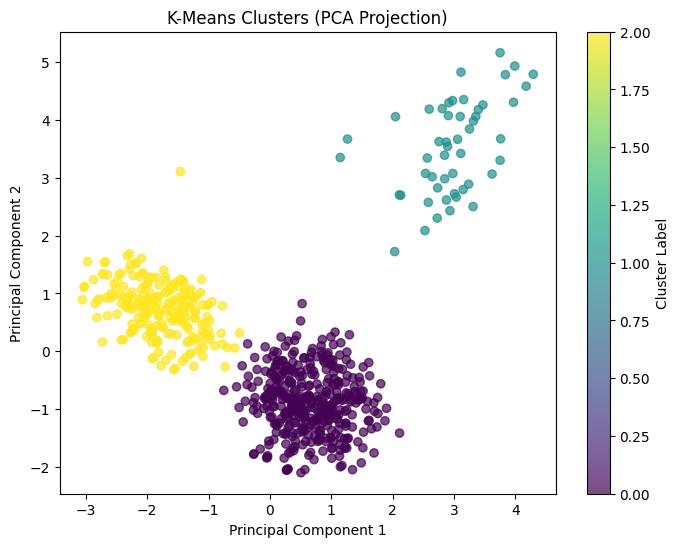

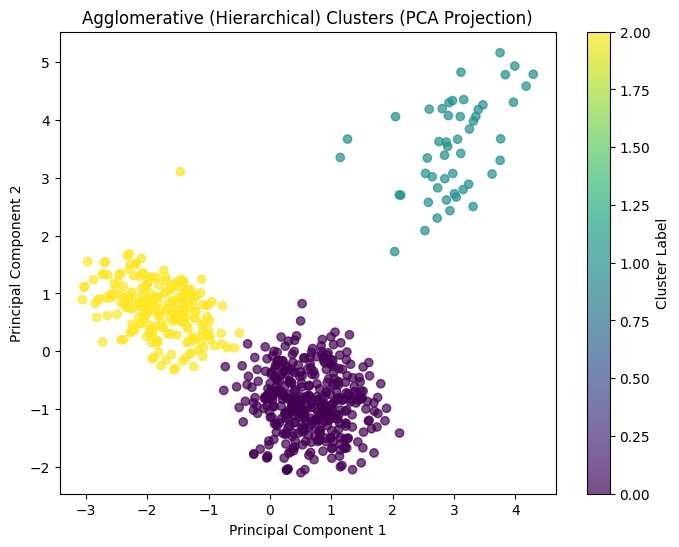

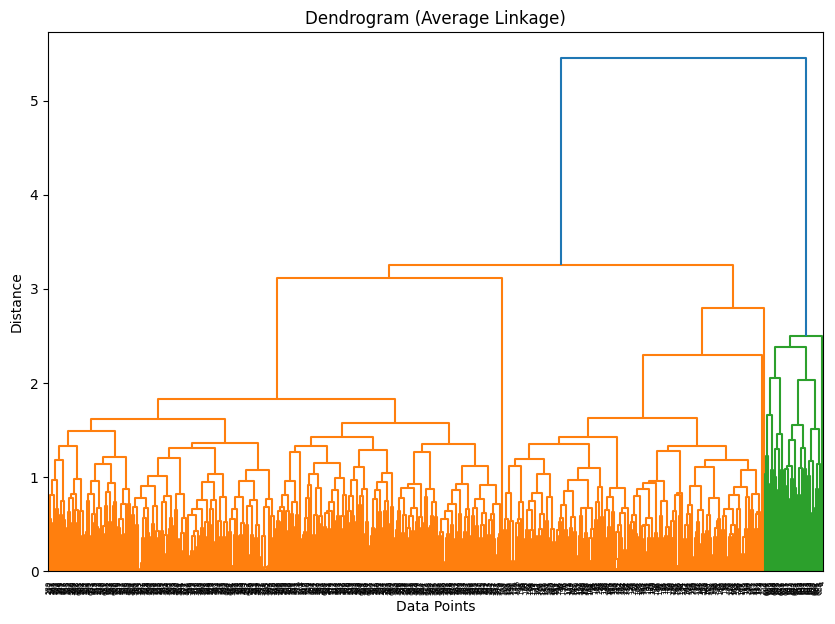

K-Means Cluster Centroids:
   Feature 0  Feature 1  Feature 2  Feature 3  Feature 4
0  -0.021062   0.373690   0.666395  -0.553672  -0.553005
1   2.831764   1.862226  -1.105763   2.827319  -0.874330
2  -0.595796  -1.059623  -0.901518   0.322997   1.148109
Agglomerative Clustering Cluster Profiles:
                0         1         2         3         4
Cluster                                                  
0       -0.022902  0.371882  0.664034 -0.552775 -0.551200
1        2.831764  1.862226 -1.105763  2.827319 -0.874330
2       -0.595179 -1.062913 -0.904453  0.325372  1.152605


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

hierarchical = AgglomerativeClustering(n_clusters=3, linkage='average')
hierarchical_labels = hierarchical.fit_predict(scaled_data)

ari_score = adjusted_rand_score(kmeans_labels, hierarchical_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.2f}")

kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)

print(f"Silhouette Score for K-Means: {kmeans_silhouette:.2f}")
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.2f}")


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
plt.title('Agglomerative (Hierarchical) Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title(f'Dendrogram (Average Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f'Feature {i}' for i in range(scaled_data.shape[1])])
print("K-Means Cluster Centroids:")
print(kmeans_centroids)

agg_clusters = pd.DataFrame(scaled_data)
agg_clusters['Cluster'] = hierarchical_labels
agg_cluster_profiles = agg_clusters.groupby('Cluster').mean()
print("Agglomerative Clustering Cluster Profiles:")
print(agg_cluster_profiles)


# K-Means vs Hierarchical Clustering: A Comparison

## Adjusted Rand Index (ARI): 0.99
- **Meaning**: The ARI score of **0.99** indicates that the clusters obtained from **K-means** and **Hierarchical Clustering** are almost identical, revealing both methods detect the same underlying structure in the dataset.

## Silhouette Score: 0.52 for Both
- **Meaning**: Both methods yielded a **Silhouette Score of 0.52**, suggesting that the cohesion and separation of the clusters are moderate. While the score indicates acceptable clustering, higher values would indicate better-defined clusters.

## Cluster Profiles

- **K-Means Centroids**:
  - **Cluster 0**: [-0.021, 0.374, 0.666, -0.554, -0.553]
  - **Cluster 1**: [2.832, 1.862, -1.106, 2.827, -0.874]
  - **Cluster 2**: [-0.596, -1.060, -0.902, 0.323, 1.148]
  
- **Hierarchical Clustering Profiles**:
  - **Cluster 0**: [-0.023, 0.372, 0.664, -0.553, -0.551]
  - **Cluster 1**: [2.832, 1.862, -1.106, 2.827, -0.874]
  - **Cluster 2**: [-0.595, -1.063, -0.904, 0.325, 1.153]

- **Analysis**: The cluster centroids in **K-means** and the cluster profiles in **Hierarchical Clustering** are highly similar due to the high ARI score of 0.99.

## Cluster Structure

- **K-Means**: Creates **well-defined clusters** with clear centroids, providing a straightforward interpretation of cluster boundaries.
  
- **Hierarchical Clustering**: Produces **overlapping clusters** near boundaries, but the **dendrogram** offers visual insights into how clusters are formed, aiding in understanding the hierarchical relationships.

## Computational Efficiency
- **K-Means**: More **efficient** and **scalable**, making it suitable for larger datasets due to fewer computations once the number of clusters is set.
- **Hierarchical Clustering**: More **computationally expensive**, especially with large datasets, as it requires calculating pairwise distances for all data points.

## Determining Cluster Numbers
- **K-Means**: The **elbow method** and **Silhouette Score** are effective in determining the optimal number of clusters (3 in this case).
- **Hierarchical Clustering**: The **dendrogram** provides flexibility to determine the optimal number of clusters but may become less practical with large datasets.

---

# Preferred Approach

Given the results:
- **K-Means** is the preferred method for **larger datasets** due to its **efficiency** and **clarity in cluster centroids**.
- **Hierarchical Clustering**, while computationally expensive, can be useful for gaining **insights into hierarchical relationships** and visualizing clusters via dendrograms.

In this case, **K-Means** is recommended for faster processing and ease of interpretation, but **Agglomerative Clustering** could be valuable when hierarchical structure is important for the analysis.


Cluster Profile Explanation:
===============================
The mean values of each feature for each cluster are summarized in this table. We can see how each cluster varies in terms of significant features by looking at this table. This is crucial to figuring out what makes each group unique.

Use Cases:
- **Customer segments**: Identified Clusters which has high-value customers, moderate users, or low-engagement customers.



In [ ]:
data_with_clusters = scaled_data.copy()
data_with_clusters['Cluster'] = cluster_labels
cluster_profile = data_with_clusters.groupby('Cluster').mean()
styled_profile = cluster_profile.style.highlight_max(color="lightgreen", axis=0)
styled_profile


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,-0.022902,0.371882,0.664034,-0.552775,-0.551200
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605


Scaled Numerical Variable Boxplots Justification:
======================================================
These boxplots show how scaled variables are distributed among Each CLuster.
Key Points:
1. **Comparison Across Clusters**: The median, which is the line inside the box, aids in determining how feature values vary between clusters.
2. **Variability Within Clusters**: The range of values inside each cluster is depicted by the boxes' and whiskers' spread.
3. **Outliers**: Outliers are represented by points outside the whiskers, which may be noise or special cases.

These revelations aid in identifying characteristics that have a major impact on the clustering process and comprehending the scale-based differences between clusters.


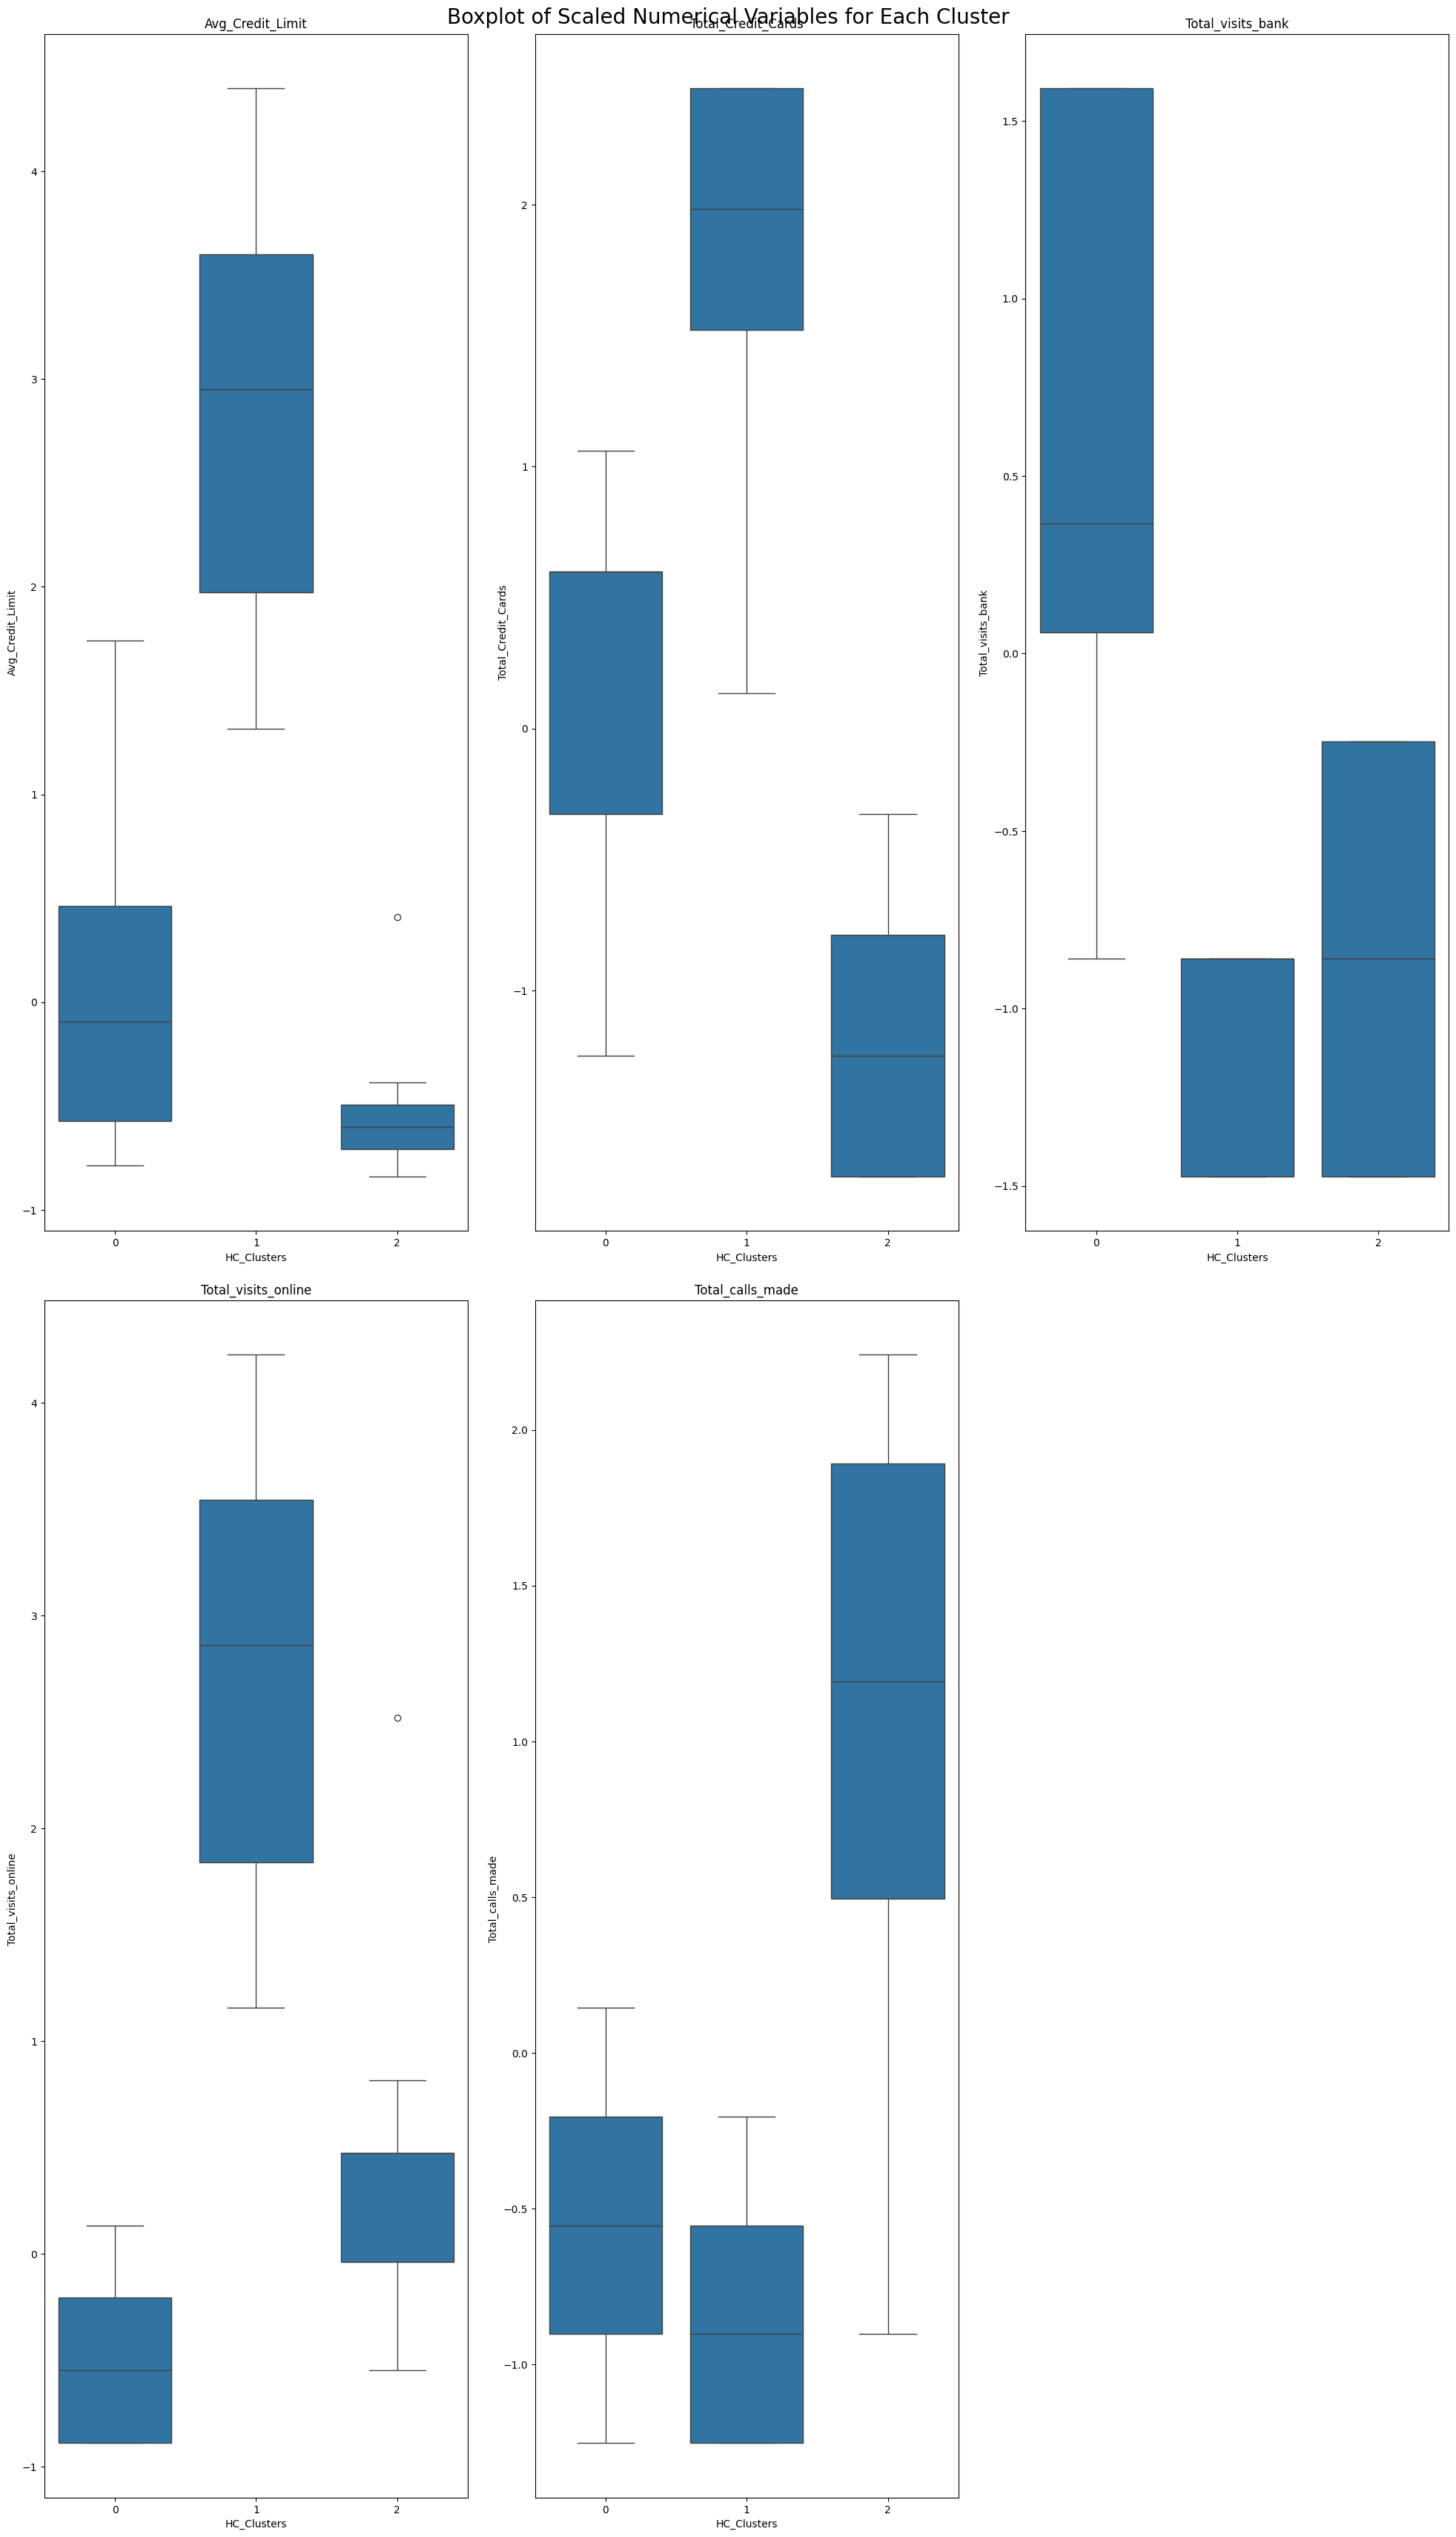

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

subset_scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)
subset_scaled_df['HC_Clusters'] = cluster_labels

plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of Scaled Numerical Variables for Each Cluster", fontsize=20)

for i, variable in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)
    plt.title(variable)

plt.tight_layout(pad=2.0)
plt.show()


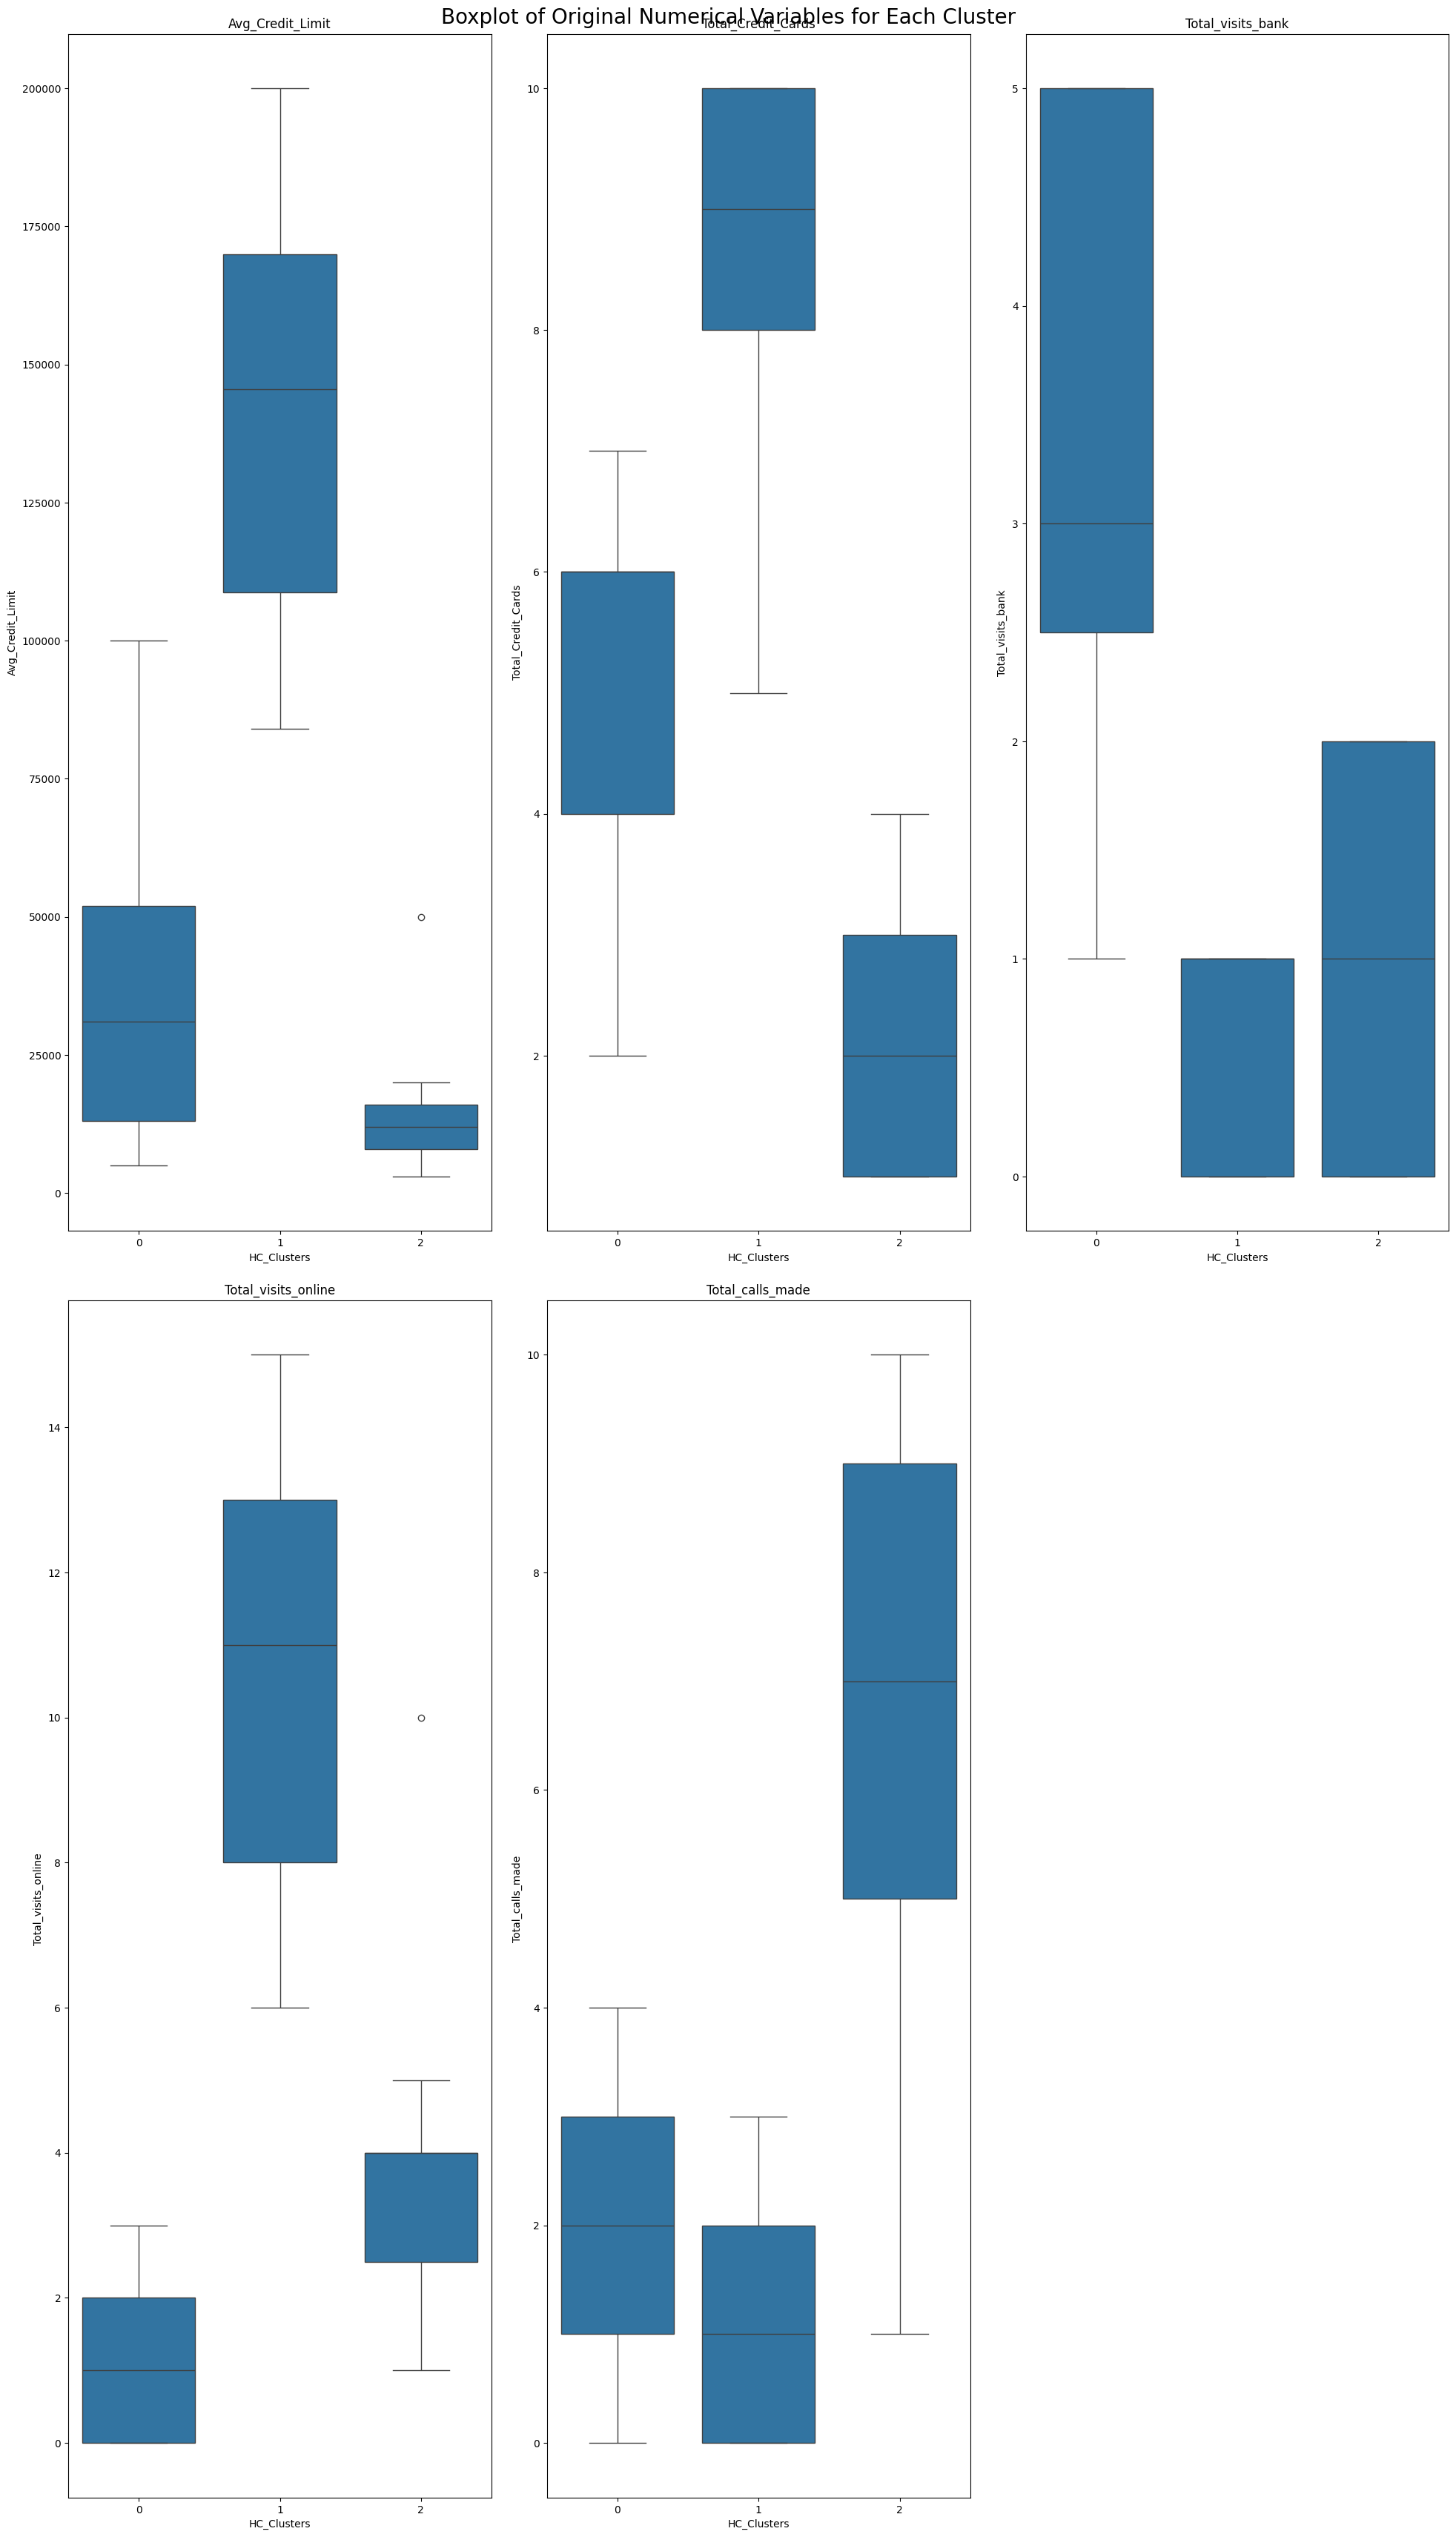

In [ ]:
df['HC_Clusters'] = cluster_labels
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of Original Numerical Variables for Each Cluster", fontsize=20)

for i, variable in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)
    plt.title(variable)

plt.tight_layout(pad=2.0)
plt.show()


## Actionable Insights & Recommendations

### Insights

#### Customer Segmentation:
- **Cluster 0**: Clients with a little above-average number of credit cards and moderate credit consumption. Compared to other clusters, they visit the bank more frequently and prefer in-person interactions, but their online and phone visits are below average.
- **Cluster 1**: Clients with the fewest credit cards and the lowest average credit limit. Among the clusters, they make the most calls and engage in moderately high levels of online activity, indicating a preference for phone-based relationships.
- **Cluster 2**: High-value clients who have the most credit cards and the highest average credit limit. They have the lowest frequency of in-person bank visits and below-average phone activity, but they vastly prefer online contacts, as evidenced by their greatest frequency of online visits.

#### Engagement Patterns:
- Customers in **Cluster 0** exhibit higher activity across multiple channels.
- Customers in **Cluster 2** show low activity and may need targeted re-engagement strategies.

#### Behavioral Trends:
- Online visits and customer calls are positively correlated with credit usage.
- Improving the digital experience could further boost engagement, especially for lower-tier clusters.

### Recommendations

#### Marketing Strategies:
1. Focus on **Cluster 0** with premium offers, personalized loyalty programs, and high-value services to retain their business.
2. Engage **Cluster 2** with tailored campaigns such as discounts, cashback, or exclusive benefits to encourage activity.

#### Enhance Digital Channels:
- Simplify and improve the online experience for customers in **Cluster 1** and **Cluster 2**.
- Introduce user-friendly interfaces and provide better incentives for using digital services.

#### Resource Allocation:
- Allocate marketing resources to retain high-value customers in **Cluster 0**.
- Dedicate efforts to boost engagement among lower-value customers in **Cluster 2** & Dedicate call-center resources to **Cluster 1**, offering **personalized** and **efficient phone assistance**.

#### Customer Support Improvements:
- Strengthen customer support capabilities to increase engagement metrics such as calls and visits.
- Focus support initiatives on **Cluster 2** customers who may require additional guidance.
- Expand online help options, including AI-driven chat support and virtual financial advisors.


